## Metropolis-Hastings Algorithm

This notebook implements the Random Walk Metropolis algorithm for sampling from one-dimensional distributions.

Reference: https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm

In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
@jit(nopython=True)
def metropolis_hastings(warm_up, nb_samples, target_distribution, jumping_distribution):
    # Compute total number of samples
    total_nb_samples = warm_up + nb_samples
    
    # Keeps track of the generated samples
    samples = np.empty(total_nb_samples)
    
    # Sample the initial value
    samples[0] = jumping_distribution(0.)
    
    for i in range(1, total_nb_samples):
        # Generate a proposal
        proposal = jumping_distribution(samples[i-1])
        
        # Compute probability of acceptance of the proposal
        acceptance_prob = min(1., target_distribution(proposal) / target_distribution(samples[i-1]))
        
        # Accept with prob `acceptance_prob`, reject otherwise
        if np.random.rand() < acceptance_prob: 
            samples[i] = proposal
        else:
            samples[i] = samples[i-1]
            
    return samples

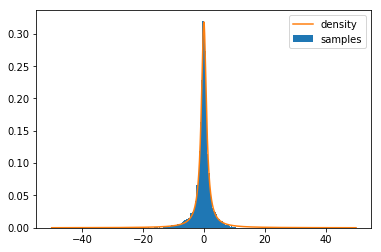

In [3]:
@jit(nopython=True)
def target_distribution(x):
    return 1 / (np.pi * (1 + x ** 2)) # Cauchy distribution

@jit(nopython=True)
def jumping_distribution(x):
    return np.random.normal(loc=x, scale=1)

x = np.arange(-50, 50, 0.01)
density_values = target_distribution(x)

warm_up = 20000
nb_samples = 20000
total_samples = metropolis_hastings(warm_up, nb_samples, target_distribution, jumping_distribution)

plt.hist(total_samples[warm_up:], bins=75, density=True, label='samples')
plt.plot(x, density_values, label='density')
plt.legend();